## Imports and functions

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

In [2]:
def get_best_n():
    scaler = StandardScaler()
    best = 0
    n_pca = 0
    scaler.fit(df_input)
    scaled_data = scaler.transform(df_input)
    for i, val in enumerate(range(len(scaled_data[1]))):
        if i == 0:
            i = 1
        pca = PCA(n_components = i)
        pca.fit(scaled_data)
        x_pca = pca.transform(scaled_data)
        nX_train, nX_test, ny_train, ny_test = train_test_split(x_pca,df_result, test_size=0.3, random_state=123)
        n_model = SVR()
        n_model = n_model.fit(nX_train, ny_train)
        val = n_model.score(nX_test,ny_test)
        if abs(val) > abs(best):
            best = val
            n_pca = i
    return (n_pca,best)

In [3]:
def outlier_removal(df_input):
    for i in range(len(df_input.columns)):
        upperlimit = df_input.iloc[:, i].quantile(0.95)
        lowerlimit = df_input.iloc[:, i].quantile(0.05)
        upper_shape = df_input[df_input.iloc[:, i] > upperlimit].shape[0]
        lower_shape = df_input[df_input.iloc[:, i] < lowerlimit].shape[0]
        if ((lower_shape < 20) or (upper_shape < 20)):
             continue
        else: 
            df_input = df_input[(df_input.iloc[:, i] > lowerlimit) & (df_input.iloc[:, i] < upperlimit)]
    return df_input

In [4]:
gs_SVM = GridSearchCV(SVR(),{
    'kernel' : ['linear', 'poly'], 
    }, cv=10, return_train_score=False, scoring = 'neg_mean_squared_error')

## Default

In [5]:
df_regressionData = pd.read_excel("trainDataset.xls", usecols = ['RelapseFreeSurvival (outcome)','Age','original_shape_Elongation','original_shape_Flatness','original_shape_LeastAxisLength','original_shape_MajorAxisLength','original_shape_Maximum2DDiameterColumn','original_shape_Maximum2DDiameterRow','original_shape_Maximum2DDiameterSlice','original_shape_Maximum3DDiameter','original_shape_MeshVolume','original_shape_MinorAxisLength','original_shape_Sphericity','original_shape_SurfaceArea','original_shape_SurfaceVolumeRatio','original_shape_VoxelVolume','original_firstorder_10Percentile','original_firstorder_90Percentile','original_firstorder_Energy','original_firstorder_Entropy','original_firstorder_InterquartileRange','original_firstorder_Kurtosis','original_firstorder_Maximum','original_firstorder_MeanAbsoluteDeviation','original_firstorder_Mean','original_firstorder_Median','original_firstorder_Minimum','original_firstorder_Range','original_firstorder_RobustMeanAbsoluteDeviation','original_firstorder_RootMeanSquared','original_firstorder_Skewness','original_firstorder_TotalEnergy','original_firstorder_Uniformity','original_firstorder_Variance','original_glcm_Autocorrelation','original_glcm_ClusterProminence','original_glcm_ClusterShade','original_glcm_ClusterTendency','original_glcm_Contrast','original_glcm_Correlation','original_glcm_DifferenceAverage','original_glcm_DifferenceEntropy','original_glcm_DifferenceVariance','original_glcm_Id','original_glcm_Idm','original_glcm_Idmn','original_glcm_Idn','original_glcm_Imc1','original_glcm_Imc2','original_glcm_InverseVariance','original_glcm_JointAverage','original_glcm_JointEnergy','original_glcm_JointEntropy','original_glcm_MCC','original_glcm_MaximumProbability','original_glcm_SumAverage','original_glcm_SumEntropy','original_glcm_SumSquares','original_gldm_DependenceEntropy','original_gldm_DependenceNonUniformity','original_gldm_DependenceNonUniformityNormalized','original_gldm_DependenceVariance','original_gldm_GrayLevelNonUniformity','original_gldm_GrayLevelVariance','original_gldm_HighGrayLevelEmphasis','original_gldm_LargeDependenceEmphasis','original_gldm_LargeDependenceHighGrayLevelEmphasis','original_gldm_LargeDependenceLowGrayLevelEmphasis','original_gldm_LowGrayLevelEmphasis','original_gldm_SmallDependenceEmphasis','original_gldm_SmallDependenceHighGrayLevelEmphasis','original_gldm_SmallDependenceLowGrayLevelEmphasis','original_glrlm_GrayLevelNonUniformity','original_glrlm_GrayLevelNonUniformityNormalized','original_glrlm_GrayLevelVariance','original_glrlm_HighGrayLevelRunEmphasis','original_glrlm_LongRunEmphasis','original_glrlm_LongRunHighGrayLevelEmphasis','original_glrlm_LongRunLowGrayLevelEmphasis','original_glrlm_LowGrayLevelRunEmphasis','original_glrlm_RunEntropy','original_glrlm_RunLengthNonUniformity','original_glrlm_RunLengthNonUniformityNormalized','original_glrlm_RunPercentage','original_glrlm_RunVariance','original_glrlm_ShortRunEmphasis','original_glrlm_ShortRunHighGrayLevelEmphasis','original_glrlm_ShortRunLowGrayLevelEmphasis','original_glszm_GrayLevelNonUniformity','original_glszm_GrayLevelNonUniformityNormalized','original_glszm_GrayLevelVariance','original_glszm_HighGrayLevelZoneEmphasis','original_glszm_LargeAreaEmphasis','original_glszm_LargeAreaHighGrayLevelEmphasis','original_glszm_LargeAreaLowGrayLevelEmphasis','original_glszm_LowGrayLevelZoneEmphasis','original_glszm_SizeZoneNonUniformity','original_glszm_SizeZoneNonUniformityNormalized','original_glszm_SmallAreaEmphasis','original_glszm_SmallAreaHighGrayLevelEmphasis','original_glszm_SmallAreaLowGrayLevelEmphasis','original_glszm_ZoneEntropy','original_glszm_ZonePercentage','original_glszm_ZoneVariance','original_ngtdm_Busyness','original_ngtdm_Coarseness','original_ngtdm_Complexity','original_ngtdm_Contrast','original_ngtdm_Strength'])
df_regressionData = df_regressionData.replace(999, np.nan)

In [6]:
df_regressionData.dtypes.unique()

array([dtype('float64'), dtype('int64')], dtype=object)

In [7]:
df_regressionData.shape

(400, 109)

In [8]:
df_regressionData.isna().sum().sum()

0

In [9]:
#Min-max scaler improves results dramaticaly compared to standardscaler()
scaler = MinMaxScaler()
df_regressionData = pd.DataFrame(scaler.fit_transform(df_regressionData),columns=df_regressionData.columns,index=df_regressionData.index)

In [10]:
df_result = df_regressionData.iloc[:, 0]
df_input = df_regressionData.iloc[:, 1:]

In [11]:
x_train,x_test,y_train,y_test=train_test_split(df_input,df_result,test_size=0.3,random_state=1)

In [12]:
gs_SVM.fit(x_train,y_train)
dfgs = pd.DataFrame(gs_SVM.cv_results_)
dfgs[['param_kernel', 'mean_test_score']]

,param_kernel,mean_test_score
0,linear,-0.043534
1,poly,-0.047437


## Outlier removal

In [13]:
#df_regressionData = outlier_removal(df_regressionData)
#df_regressionData.shape

## PCA

In [14]:
val = get_best_n()
val

(7, -0.10890457736878467)

In [15]:
pca = PCA(n_components = 7)
pca.fit(df_input)
x_pca = pca.transform(df_input)

In [16]:
nX_train, nX_test, ny_train, ny_test = train_test_split(x_pca,df_result, test_size=0.3, random_state=123)

In [17]:
gs_SVM.fit(nX_train,ny_train)
dfgs = pd.DataFrame(gs_SVM.cv_results_)
dfgs[['param_kernel', 'mean_test_score']]

,param_kernel,mean_test_score
0,linear,-0.035331
1,poly,-0.041889


## Pairwise correlation removal

In [18]:
def correlation(df, threshold):
    correlated_cols = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                correlated_cols.add(colname)
    return correlated_cols

In [19]:
corr_features = correlation(df_input,0.85)

In [20]:
corr_features = correlation(df_input,0.85)
df_corr = pd.read_excel("trainDataset.xls", usecols = corr_features)  
df_corr.shape

(400, 73)

In [21]:
#Pairwise corr removal of features who correlate > abs(0.9) with each other
df_corr = df_corr.drop(['original_shape_Maximum2DDiameterSlice',
                        'original_shape_SurfaceArea',
                        'original_firstorder_Energy',
                        'original_firstorder_Mean',
                        'original_firstorder_MeanAbsoluteDeviation',
                        'original_firstorder_Uniformity',
                        'original_firstorder_Entropy',
                        'original_firstorder_Median', 
                        'original_shape_VoxelVolume',
                        'original_glcm_ClusterProminence',
                        'original_glcm_ClusterTendency',
                        'original_firstorder_Variance',
                        'original_glcm_Contrast',
                        'original_glcm_DifferenceAverage',
                        'original_glcm_DifferenceVariance',
                        'original_glcm_Id',
                        'original_glcm_Idm',
                        'original_glcm_Idmn',
                        'original_glcm_DifferenceEntropy',
                        'original_glcm_Idn',
                        'original_glcm_JointEnergy',
                        'original_glcm_JointEntropy',
                        'original_glcm_SumEntropy',
                        'original_glcm_SumSquares',
                        'original_glcm_MaximumProbability',
                        'original_gldm_LowGrayLevelEmphasis',
                        'original_glrlm_GrayLevelNonUniformityNormalized',
                        'original_gldm_HighGrayLevelEmphasis',
                        'original_glrlm_GrayLevelNonUniformity',
                        'original_glrlm_LongRunHighGrayLevelEmphasis',
                        'original_gldm_GrayLevelNonUniformity',
                        'original_gldm_GrayLevelVariance',
                        'original_gldm_LargeDependenceEmphasis',
                        'original_gldm_LargeDependenceHighGrayLevelEmphasis',
                        'original_gldm_LargeDependenceLowGrayLevelEmphasis',
                        'original_glrlm_GrayLevelVariance',
                        'original_glszm_LowGrayLevelZoneEmphasis',
                        'original_glrlm_ShortRunEmphasis',
                        'original_glszm_SmallAreaLowGrayLevelEmphasis',
                        'original_glrlm_LongRunEmphasis',
                        'original_glszm_LargeAreaHighGrayLevelEmphasis',
                        'original_ngtdm_Complexity',
                        'original_ngtdm_Coarseness',
                        'original_ngtdm_Contrast',
                        'original_glcm_SumAverage'
                       ],axis=1)

In [22]:
df_corr.shape

(400, 28)

<AxesSubplot: >

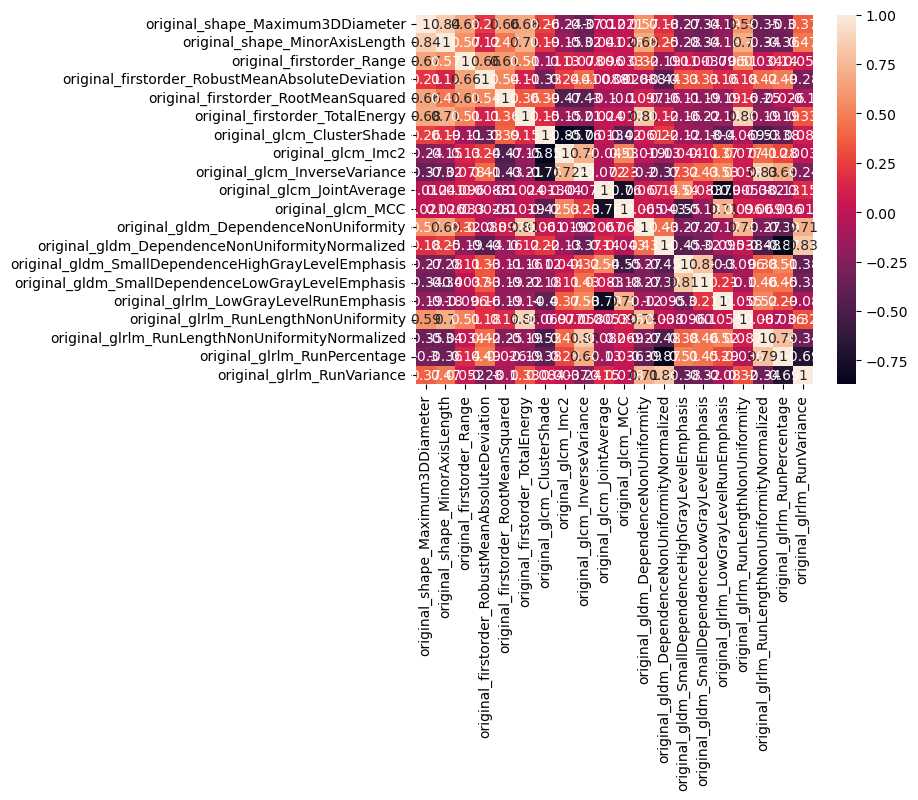

In [23]:
corrmatrix = df_corr.iloc[:, 0:20].corr()
sns.heatmap(corrmatrix,annot=True)

In [24]:
#Pairwise corr removal
df_input = df_input.drop(['original_shape_Maximum2DDiameterSlice',
                        'original_shape_SurfaceArea',
                        'original_firstorder_Energy',
                        'original_firstorder_Mean',
                        'original_firstorder_MeanAbsoluteDeviation',
                        'original_firstorder_Uniformity',
                        'original_firstorder_Entropy',
                        'original_firstorder_Median', 
                        'original_shape_VoxelVolume',
                        'original_glcm_ClusterProminence',
                        'original_glcm_ClusterTendency',
                        'original_firstorder_Variance',
                        'original_glcm_Contrast',
                        'original_glcm_DifferenceAverage',
                        'original_glcm_DifferenceVariance',
                        'original_glcm_Id',
                        'original_glcm_Idm',
                        'original_glcm_Idmn',
                        'original_glcm_DifferenceEntropy',
                        'original_glcm_Idn',
                        'original_glcm_JointEnergy',
                        'original_glcm_JointEntropy',
                        'original_glcm_SumEntropy',
                        'original_glcm_SumSquares',
                        'original_glcm_MaximumProbability',
                        'original_gldm_LowGrayLevelEmphasis',
                        'original_glrlm_GrayLevelNonUniformityNormalized',
                        'original_gldm_HighGrayLevelEmphasis',
                        'original_glrlm_GrayLevelNonUniformity',
                        'original_glrlm_LongRunHighGrayLevelEmphasis',
                        'original_gldm_GrayLevelNonUniformity',
                        'original_gldm_GrayLevelVariance',
                        'original_gldm_LargeDependenceEmphasis',
                        'original_gldm_LargeDependenceHighGrayLevelEmphasis',
                        'original_gldm_LargeDependenceLowGrayLevelEmphasis',
                        'original_glrlm_GrayLevelVariance',
                        'original_glszm_LowGrayLevelZoneEmphasis',
                        'original_glrlm_ShortRunEmphasis',
                        'original_glszm_SmallAreaLowGrayLevelEmphasis',
                        'original_glrlm_LongRunEmphasis',
                        'original_glszm_LargeAreaHighGrayLevelEmphasis',
                        'original_ngtdm_Complexity',
                        'original_ngtdm_Coarseness',
                        'original_ngtdm_Contrast',
                        'original_glcm_SumAverage'
                       ],axis=1)

In [25]:
df_input.shape

(400, 63)

In [26]:
nX_train, nX_test, ny_train, ny_test = train_test_split(df_input,df_result, test_size=0.3, random_state=123)
n_model = RandomForestRegressor(n_estimators=100)
n_model.fit(nX_train, ny_train)
pred = n_model.predict(nX_test)

In [27]:
gs_SVM.fit(nX_train,ny_train)
dfgs = pd.DataFrame(gs_SVM.cv_results_)
dfgs[['param_kernel', 'mean_test_score']]

,param_kernel,mean_test_score
0,linear,-0.037257
1,poly,-0.044543


In [28]:
val = get_best_n()
val

(15, -0.09743148637590426)

In [29]:
pca = PCA(n_components = 15)
pca.fit(df_input)
x_pca = pca.transform(df_input)

In [30]:
x_pca.shape

(400, 15)

In [31]:
nX_train, nX_test, ny_train, ny_test = train_test_split(x_pca,df_result, test_size=0.3, random_state=123)

In [32]:
gs_SVM.fit(nX_train,ny_train)
dfgs = pd.DataFrame(gs_SVM.cv_results_)
dfgs[['param_kernel', 'mean_test_score']]

,param_kernel,mean_test_score
0,linear,-0.037583
1,poly,-0.064221
